# **Optimización de campañas publicitarias a través del análisis de sentimientos: Un enfoque basado en algoritmos de clasificación**

## **Contextualización:**

En la era digital, la eficacia de las campañas publicitarias es crucial para el éxito de las marcas en un mercado altamente competitivo. Este artículo explora cómo el análisis de sentimientos, implementado mediante algoritmos de clasificación, puede optimizar las estrategias publicitarias. Utilizando técnicas avanzadas de procesamiento de lenguaje natural y machine learning, se analizan grandes volúmenes de datos provenientes de la red social de twitter, donde reseñas de productos y comentarios de usuarios pueden ayudar a identificar patrones y tendencias en las percepciones de los consumidores. Los resultados de un estudio así pueden demostrar que la incorporación del análisis de sentimientos permite una segmentación más precisa del mercado, una personalización de los mensajes publicitarios y una mejora en la toma de decisiones estratégicas. Este estudio destaca el potencial del análisis de sentimientos como una herramienta poderosa para mejorar la efectividad y el retorno de inversión de las campañas publicitarias, proporcionando a los profesionales de marketing un enfoque basado en datos para abordar las necesidades y preferencias de los consumidores.

### **Palabras clave:**

Análisis de Sentimientos, Algoritmos de Clasificación, Campañas Publicitarias, Optimización de Publicidad, Machine Learning, Estrategias de Marketing, Opinión del Consumidor.

### **Situación problema:**

En el ámbito del análisis de sentimientos aplicado a las campañas publicitarias, una correcta clasificación de los comentarios es crucial para comprender la percepción del público y ajustar estrategias de marketing de manera efectiva. Sin embargo, uno de los mayores desafíos radica en la clasificación precisa de los comentarios negativos, ya que estos suelen proporcionar información valiosa sobre los puntos débiles o áreas de mejora de un producto o servicio. La subestimación o incorrecta clasificación de estos comentarios puede llevar a una interpretación errónea de la satisfacción del cliente y, en consecuencia, a decisiones estratégicas mal informadas. Este artículo se enfoca en evaluar diferentes modelos de clasificación de texto, con un énfasis particular en la capacidad de cada modelo para identificar y clasificar correctamente los comentarios negativos. A través de un riguroso proceso de ajuste y validación, buscamos identificar el modelo que no solo maximice la precisión general, sino que también demuestre una alta especificidad y sensibilidad hacia los comentarios negativos, asegurando así una interpretación más precisa y accionable de los sentimientos del público.

### **Datos:**

En este paper, se utilizaron datos provenientes de redes sociales, específicamente de Twitter, donde se analizaron los posts realizados por diversos usuarios en el año 2009. El dataset Sentiment140 encontrado en Kaggle, contiene 1,600,000 tweets extraídos mediante la API de Twitter, fue empleado para este análisis. Estos tweets han sido anotados con polaridades de sentimiento (0 = negativo, 4 = positivo) y pueden ser utilizados para detectar sentimientos. El dataset incluye seis campos: la polaridad del tweet, el identificador único del tweet, la fecha y hora de publicación, la consulta utilizada para extraer el tweet, el nombre de usuario que publicó el tweet y el contenido del tweet. Esta información permite estudiar cómo los usuarios expresan sus emociones en redes sociales y cómo estas expresiones pueden ser clasificadas automáticamente mediante algoritmos de clasificación y procesamiento de lenguaje natural.

## **Importacion de librerias:**

In [3]:
# Importación de librerías necesarias
import pandas as pd  # Librería para manipulación de datos
from sklearn.model_selection import train_test_split  # Función para dividir los datos en entrenamiento y prueba
from sklearn.feature_extraction.text import TfidfVectorizer  # Convertidor de texto a vectores TF-IDF
from sklearn.linear_model import LogisticRegression, RidgeClassifier  # Modelos de regresión logística y Ridge
from sklearn.ensemble import RandomForestClassifier  # Modelo de bosque aleatorio
from sklearn.svm import SVC  # Modelo de máquina de soporte vectorial
from sklearn.pipeline import Pipeline  # Herramienta para crear pipelines de procesamiento y modelado
from sklearn.metrics import classification_report, accuracy_score  # Métricas para evaluación del modelo
import re  # Librería para expresiones regulares
import string  # Librería para operaciones con cadenas de texto
import matplotlib.pyplot as plt  # Librería para visualización de datos
import seaborn as sns  # Librería para visualización de datos
from wordcloud import WordCloud  # Generador de nubes de palabras
# Importar GridSearchCV del módulo model_selection de scikit-learn
# GridSearchCV se utiliza para realizar una búsqueda exhaustiva sobre los parámetros especificados para un estimador
from sklearn.model_selection import GridSearchCV
# Importar KNeighborsClassifier del módulo neighbors de scikit-learn
# KNeighborsClassifier es un clasificador basado en la técnica de k-vecinos más cercanos
from sklearn.neighbors import KNeighborsClassifier

## **Lectura de Dataset**

In [4]:
# Cargar el dataset completo
df = pd.read_csv('sentiment140.csv', encoding='latin-1', header=None, names=['target', 'ids', 'date', 'flag', 'user', 'text'])

In [12]:
# Muestra las primeras 5 filas del DataFrame 'df' para dar una visión general rápida de los datos.
# Esta función es útil para verificar rápidamente el contenido y la estructura del DataFrame,
# como los nombres de las columnas y algunos valores de muestra.
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


### **Clasificacion binaria:**

In [5]:
# Filtrar los datos para mantener solo las filas donde la columna 'target' tiene valores 0 o 4
# Esto reduce el DataFrame a solo las filas de interés para un análisis específico
filtered_data = df[df['target'].isin([0, 4])]

# Reasignar los valores de la columna 'target' para simplificar la clasificación
# Cambiar 0 a 0 y 4 a 1, facilitando un enfoque binario para un modelo de clasificación
filtered_data['target'] = filtered_data['target'].apply(lambda x: 0 if x == 0 else 1)

# Verificar los cambios en la columna 'target' contando las ocurrencias de cada valor (0 y 1)
# Esto asegura que la reasignación se realizó correctamente y proporciona una visión general de la distribución de la nueva variable binaria
filtered_data['target'].value_counts()


target
0    800000
1    800000
Name: count, dtype: int64

El código filtra el DataFrame `df` para mantener solo las filas donde la columna `target` tiene valores 0 o 4, permitiendo centrarse en un subconjunto específico de los datos para un análisis más enfocado o una clasificación binaria. Luego, reasigna los valores de la columna `target` para simplificar la clasificación: los valores 0 se mantienen como 0, mientras que los valores 4 se cambian a 1, facilitando el uso de modelos de clasificación binaria. Finalmente, verifica los cambios en la columna `target` contando las ocurrencias de cada valor (0 y 1) para asegurar que la reasignación se realizó correctamente y proporciona una visión general de la distribución de la nueva variable binaria.


In [5]:
# Mostrar un resumen conciso del DataFrame 'filtered_data'
# Incluye el número de entradas, el nombre de las columnas, el tipo de datos de cada columna, y la cantidad de valores no nulos
# Esta función es útil para verificar la estructura del DataFrame y detectar posibles valores nulos o tipos de datos incorrectos
filtered_data.info()


<bound method DataFrame.info of          target         ids                          date      flag  \
0             0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1             0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2             0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3             0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4             0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...         ...         ...                           ...       ...   
1599995       1  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996       1  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997       1  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998       1  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999       1  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                    user                                               text  
0        _TheSpecialOne_  @switchfoot

### **Sample del dataset**

In [6]:
# Realizar un muestreo aleatorio del 10% del DataFrame 'filtered_data'
# 'frac=0.1' indica que se seleccionará el 10% del total de filas
# 'random_state=42' asegura que el muestreo sea reproducible, obteniendo los mismos resultados cada vez que se ejecute
df_sample = filtered_data.sample(frac=0.1, random_state=42)


El código realiza un muestreo aleatorio del 10% del DataFrame `filtered_data`, seleccionando el 10% del total de filas mediante `frac=0.1`. El parámetro `random_state=42` asegura que el muestreo sea reproducible, obteniendo los mismos resultados cada vez que se ejecute. Este muestreo aleatorio permite trabajar con una muestra representativa del conjunto de datos original, reduciendo el tamaño del DataFrame para análisis o procesamiento más rápidos sin perder la representatividad del conjunto de datos completo.


In [8]:
# Mostrar un resumen conciso del DataFrame 'df_sample'
# Incluye el número de entradas, el nombre de las columnas, el tipo de datos de cada columna, y la cantidad de valores no nulos
# Esta función es útil para verificar la estructura del DataFrame después de realizar el muestreo, asegurándose de que se mantengan las características y la integridad de los datos
df_sample.info()


<bound method DataFrame.info of          target         ids                          date      flag  \
541200        0  2200003196  Tue Jun 16 18:18:12 PDT 2009  NO_QUERY   
750           0  1467998485  Mon Apr 06 23:11:14 PDT 2009  NO_QUERY   
766711        0  2300048954  Tue Jun 23 13:40:11 PDT 2009  NO_QUERY   
285055        0  1993474027  Mon Jun 01 10:26:07 PDT 2009  NO_QUERY   
705995        0  2256550904  Sat Jun 20 12:56:51 PDT 2009  NO_QUERY   
...         ...         ...                           ...       ...   
1574177       1  2189199207  Mon Jun 15 23:28:21 PDT 2009  NO_QUERY   
49646         0  1678213724  Sat May 02 05:56:37 PDT 2009  NO_QUERY   
1317229       1  2014242841  Wed Jun 03 00:53:53 PDT 2009  NO_QUERY   
520455        0  2192116541  Tue Jun 16 06:32:06 PDT 2009  NO_QUERY   
427964        0  2063837266  Sun Jun 07 04:16:08 PDT 2009  NO_QUERY   

                    user                                               text  
541200   LaLaLindsey0609             

In [9]:
# Obtener la forma del DataFrame 'df_sample'
# Devuelve una tupla que representa el número de filas y columnas del DataFrame
# Esto es útil para verificar rápidamente el tamaño del DataFrame y asegurarse de que el muestreo se realizó correctamente
df_sample.shape


(160000, 6)

El dataset original ha sido reducido mediante un proceso de muestreo, resultando en un dataset con dimensiones (160000, 6). Esto significa que el nuevo dataset tiene 160,000 filas y 6 columnas.

##### **Interpretación de las Dimensiones**

- **Filas (160000)**: El dataset contiene 160,000 instancias. Cada fila representa un tweet individual, manteniendo una muestra representativa del conjunto de datos original. Este tamaño es adecuado para realizar análisis significativos y entrenar modelos de machine learning, permitiendo un balance entre rendimiento computacional y representatividad de los datos.

- **Columnas (6)**: El dataset incluye 6 características o variables:
  - **`target`**: La variable objetivo que indica si el tweet es positivo (1) o negativo (0).
  - **`ids`**: Identificador único para cada tweet.
  - **`date`**: Fecha y hora en que se publicó el tweet.
  - **`flag`**: Indicador de consulta o estado (posiblemente relacionado con el uso o el contexto del tweet).
  - **`user`**: Nombre de usuario que publicó el tweet.
  - **`text`**: El contenido textual del tweet.

##### **Conclusión**

Reducir el dataset a estas dimensiones mediante el muestreo permite trabajar con un conjunto de datos más manejable, manteniendo suficiente información para realizar análisis y modelado. Las 160,000 instancias ofrecen una muestra adecuada para representar las tendencias y patrones del conjunto de datos original, mientras que las 6 columnas proporcionan las características esenciales para entender y modelar los tweets.


In [10]:
# Muestra las primeras 5 filas del DataFrame 'df_sample' para dar una visión general rápida de los datos
# Esta función es útil para verificar el contenido y la estructura del DataFrame después del muestreo,
# como los nombres de las columnas y algunos valores de muestra, asegurando que los datos se hayan mantenido correctamente
df_sample.head()


,target,ids,date,flag,user,text
541200,0,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!
750,0,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo..."
766711,0,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...
285055,0,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...
705995,0,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem


El código muestra las primeras 5 filas del DataFrame `df_sample` utilizando la función `head()`. Este paso es crucial para verificar el contenido y la estructura del DataFrame después del muestreo aleatorio. La verificación incluye asegurar que los nombres de las columnas (`target`, `ids`, `date`, `flag`, `user`, `text`) sean los esperados y que los valores de muestra en cada columna sean representativos y correctos. Este proceso de validación asegura que el muestreo aleatorio del 10% del DataFrame `filtered_data` haya producido una muestra que mantiene las características esenciales del conjunto de datos original y que la estructura del DataFrame esté intacta y sea adecuada para análisis posteriores.


In [11]:
# Obtener los nombres de las columnas del DataFrame 'df_sample' y convertirlos en una lista
# 'df_sample.columns' devuelve un objeto Index con los nombres de las columnas, y 'tolist()' los convierte en una lista de Python
# Esto es útil para tener una lista de los nombres de las columnas que puede ser utilizada en otros procesos o verificaciones
column_names = df_sample.columns.tolist()

# Mostrar la lista de nombres de columnas
# Esto permite verificar fácilmente los nombres de las columnas del DataFrame
column_names


['target', 'ids', 'date', 'flag', 'user', 'text']

In [14]:
# Mostrar información básica sobre el DataFrame 'df_sample'
# 'info()' proporciona un resumen conciso del DataFrame incluyendo el número de entradas, nombres de las columnas,
# tipos de datos y la cantidad de valores no nulos
data_info = df_sample.info()

# Generar un resumen estadístico descriptivo de 'df_sample' para todas las columnas
# 'describe(include='all')' proporciona estadísticas resumidas como conteo, media, desviación estándar, mínimos,
# cuartiles y máximos para cada columna, incluyendo tanto datos numéricos como no numéricos
data_summary = df_sample.describe(include='all')

# Mostrar la información básica y el resumen estadístico descriptivo
# Esto es útil para una visión general rápida y detallada del DataFrame, verificando tanto la estructura como las estadísticas de los datos
data_info, data_summary


<class 'pandas.core.frame.DataFrame'>
Index: 160000 entries, 541200 to 427964
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   target  160000 non-null  int64 
 1   ids     160000 non-null  int64 
 2   date    160000 non-null  object
 3   flag    160000 non-null  object
 4   user    160000 non-null  object
 5   text    160000 non-null  object
dtypes: int64(2), object(4)
memory usage: 8.5+ MB


(None,
                target           ids                          date      flag  \
 count   160000.000000  1.600000e+05                        160000    160000   
 unique            NaN           NaN                        143625         1   
 top               NaN           NaN  Sun May 31 14:25:03 PDT 2009  NO_QUERY   
 freq              NaN           NaN                             6    160000   
 mean         0.501175  1.999154e+09                           NaN       NaN   
 std          0.500000  1.935047e+08                           NaN       NaN   
 min          0.000000  1.467814e+09                           NaN       NaN   
 25%          0.000000  1.957035e+09                           NaN       NaN   
 50%          1.000000  2.002126e+09                           NaN       NaN   
 75%          1.000000  2.177168e+09                           NaN       NaN   
 max          1.000000  2.329205e+09                           NaN       NaN   
 
             user              

### **Conversión de formato fecha:**

In [7]:
# Convertir la columna 'date' del DataFrame 'df_sample' a formato datetime
# 'pd.to_datetime()' convierte los valores a objetos datetime, facilitando operaciones de tiempo y fecha
# 'errors='coerce'' fuerza a que los valores no convertibles se conviertan en NaT (Not a Time), ayudando a manejar errores en los datos
df_sample['date'] = pd.to_datetime(df_sample['date'], errors='coerce')


C:\Users\Jesus David\AppData\Local\Temp\ipykernel_17328\1963231062.py:4: FutureWarning: Parsed string "Tue Jun 16 18:18:12 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df_sample['date'] = pd.to_datetime(df_sample['date'], errors='coerce')


In [8]:
# Eliminar la columna 'flag' del DataFrame 'df_sample' y almacenar el resultado en un nuevo DataFrame 'data_cleaned'
# 'drop(columns=['flag'])' elimina la columna especificada, creando un nuevo DataFrame sin modificar el original
# Esto es útil para limpiar el DataFrame de columnas innecesarias o irrelevantes para el análisis posterior
data_cleaned = df_sample.drop(columns=['flag'])


In [12]:
# Guardar el DataFrame 'df_sample' en un archivo CSV llamado 'dataset.csv'
# 'index=False' indica que no se incluirá el índice del DataFrame en el archivo CSV
# Esto es útil para compartir o almacenar el conjunto de datos muestreado sin incluir información de índice adicional
data_cleaned.to_csv('cleaned_dataset.csv', index=False)


## **EDA:**

In [17]:
# Generar un resumen estadístico descriptivo del DataFrame 'data_cleaned'
# 'describe()' proporciona estadísticas resumidas como conteo, media, desviación estándar, mínimos, cuartiles y máximos
# para las columnas numéricas del DataFrame. Esto es útil para obtener una visión general de las características estadísticas
# de los datos limpios y verificar su distribución y variabilidad
data_cleaned.describe()


,target,ids,date
count,160000.000000,1.600000e+05,160000
mean,0.501175,1.999154e+09,2009-05-31 08:08:06.682206208
min,0.000000,1.467814e+09,2009-04-06 22:20:40
25%,0.000000,1.957035e+09,2009-05-28 23:20:16.249999872
50%,1.000000,2.002126e+09,2009-06-02 03:13:40
75%,1.000000,2.177168e+09,2009-06-15 05:35:19.249999872
max,1.000000,2.329205e+09,2009-06-25 10:28:26
std,0.500000,1.935047e+08,NaN


El código genera un resumen estadístico descriptivo del DataFrame `data_cleaned` utilizando la función `describe()`. Esta función proporciona estadísticas resumidas como conteo, media, desviación estándar, mínimos, máximos, y percentiles (25%, 50%, 75%) para las columnas numéricas del DataFrame. Esto es útil para obtener una visión general de los datos limpios y verificar su distribución y variabilidad. La salida incluye información sobre el número de elementos (`count`), la media (`mean`), el valor mínimo (`min`), los cuartiles (25%, 50%, 75%), el valor máximo (`max`), y la desviación estándar (`std`) para las columnas `target`, `ids` y `date`. Este paso es esencial para entender las características fundamentales de los datos antes de realizar análisis más detallados.


C:\Users\Jesus David\AppData\Local\Temp\ipykernel_14488\347063308.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=data_cleaned, palette='viridis')


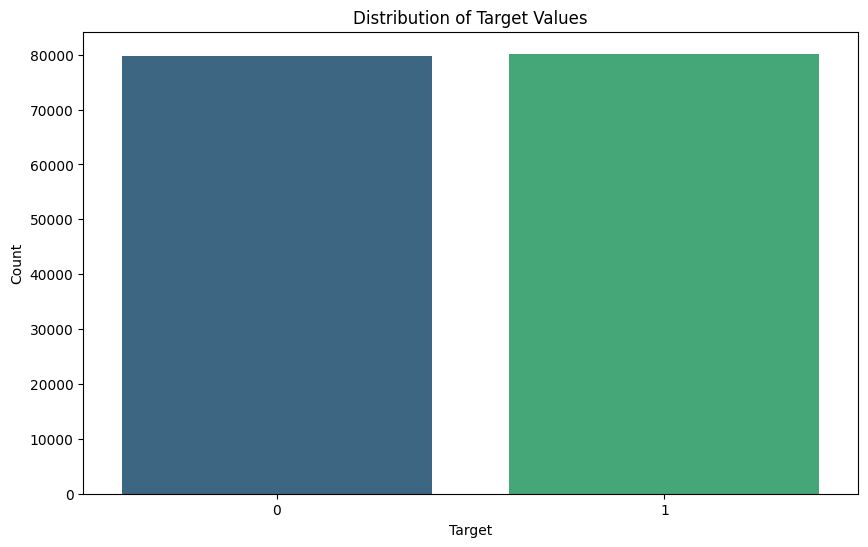

In [22]:
# Crear una nueva figura con un tamaño de 10x6 pulgadas para el gráfico
plt.figure(figsize=(10, 6))

# Crear un gráfico de conteo de la columna 'target' en el DataFrame 'data_cleaned'
# 'sns.countplot()' genera un gráfico de barras mostrando el conteo de cada valor único en la columna 'target'
# 'palette='viridis'' define la paleta de colores utilizada para las barras
sns.countplot(x='target', data=data_cleaned, palette='viridis')

# Establecer el título del gráfico
plt.title('Distribution of Target Values')

# Establecer la etiqueta del eje x
plt.xlabel('Target')

# Establecer la etiqueta del eje y
plt.ylabel('Count')

# Mostrar el gráfico
plt.show()



El gráfico de barras muestra la distribución de los valores de la columna `target` en el DataFrame. Este gráfico es útil para visualizar la cantidad de instancias en cada categoría del `target` (0 y 1). En este caso, se observa que ambas categorías tienen una cantidad similar de instancias, lo que indica un balance en los datos. Esto es importante para los modelos de clasificación, ya que un balance adecuado entre las clases ayuda a evitar sesgos durante el entrenamiento del modelo. La visualización proporciona una comprensión rápida y clara de la distribución de la variable objetivo antes de proceder con el análisis y modelado de los datos.


C:\Users\Jesus David\AppData\Local\Temp\ipykernel_14488\3776562658.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_cleaned.set_index('date').resample('M').size().plot()


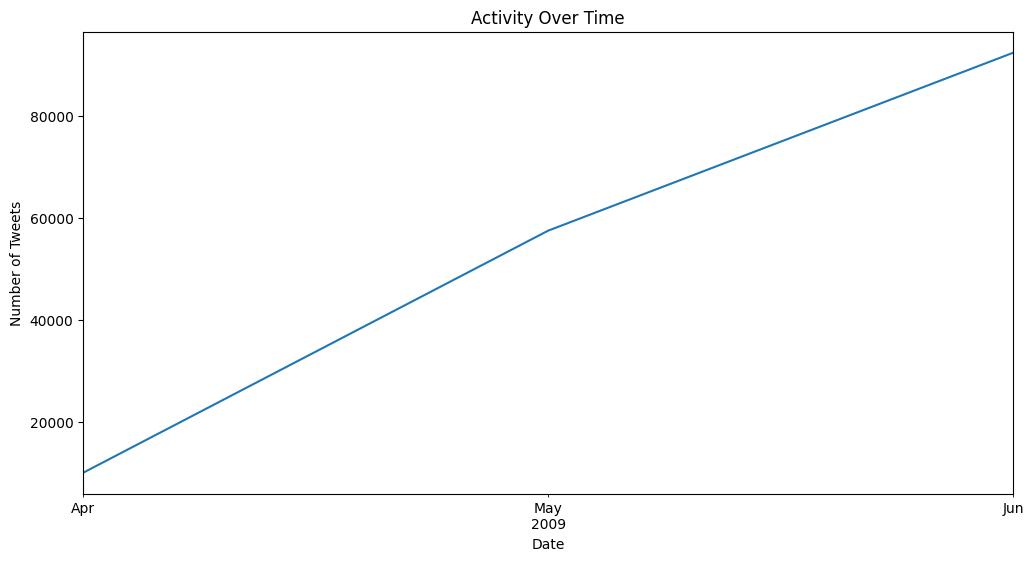

In [23]:
# Crear una nueva figura con un tamaño de 12x6 pulgadas para el gráfico
plt.figure(figsize=(12, 6))

# Establecer la columna 'date' como el índice del DataFrame 'data_cleaned'
# 'resample('M')' reagrupa los datos por mes
# 'size()' cuenta el número de entradas por cada grupo mensual
# 'plot()' genera el gráfico de la serie temporal resultante, mostrando la actividad a lo largo del tiempo
data_cleaned.set_index('date').resample('M').size().plot()

# Establecer el título del gráfico
plt.title('Activity Over Time')

# Establecer la etiqueta del eje x
plt.xlabel('Date')

# Establecer la etiqueta del eje y
plt.ylabel('Number of Tweets')

# Mostrar el gráfico
plt.show()



El gráfico de líneas muestra la actividad a lo largo del tiempo, representando el número de tweets por fecha. Este gráfico es útil para visualizar cómo cambia la actividad en el conjunto de datos a lo largo de los meses de abril, mayo y junio de 2009. Se observa una tendencia ascendente en el número de tweets, lo que indica un aumento en la actividad de los usuarios con el paso del tiempo. Esta visualización ayuda a identificar patrones temporales y puede ser crucial para entender cómo la actividad de los usuarios varía y para detectar picos o caídas en la interacción en la plataforma.


C:\Users\Jesus David\AppData\Local\Temp\ipykernel_14488\1809030638.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_users.index, x=top_users.values, palette='viridis')


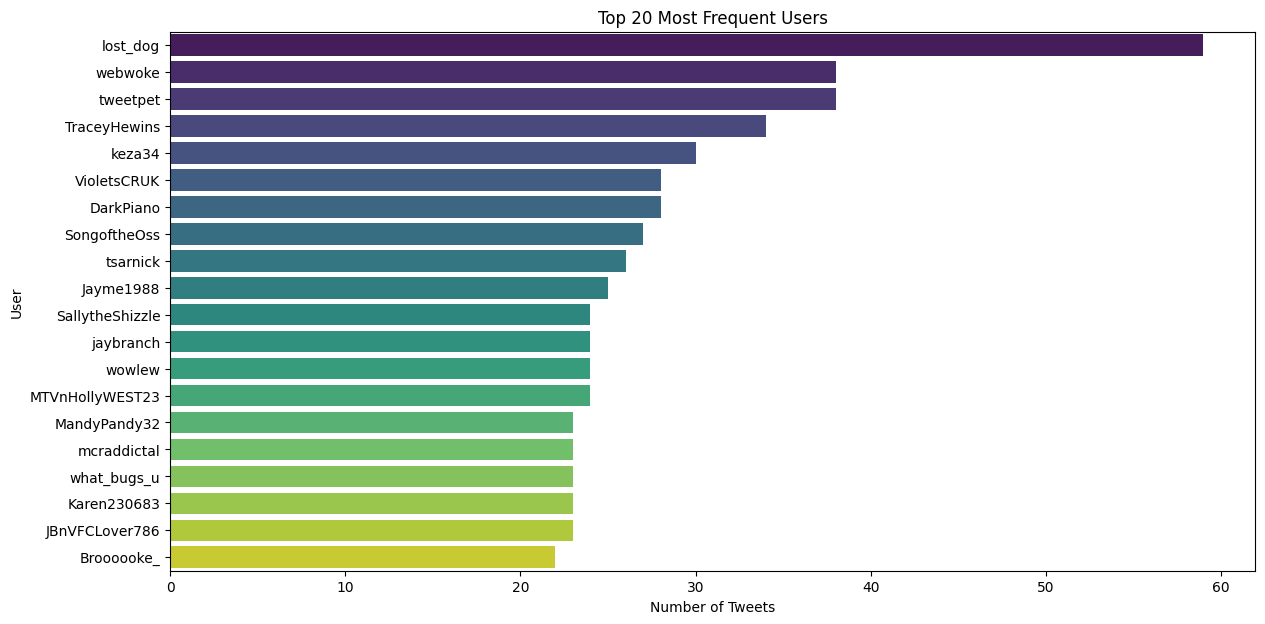

In [24]:
# Crear una nueva figura con un tamaño de 14x7 pulgadas para el gráfico
plt.figure(figsize=(14, 7))

# Obtener los 20 usuarios más frecuentes del DataFrame 'data_cleaned'
# 'value_counts()' cuenta las ocurrencias de cada usuario
# 'nlargest(20)' selecciona los 20 usuarios con más tweets
top_users = data_cleaned['user'].value_counts().nlargest(20)

# Crear un gráfico de barras para los 20 usuarios más frecuentes
# 'sns.barplot()' genera el gráfico de barras
# 'y=top_users.index' y 'x=top_users.values' definen las etiquetas y los valores de las barras respectivamente
# 'palette='viridis'' define la paleta de colores utilizada para las barras
sns.barplot(y=top_users.index, x=top_users.values, palette='viridis')

# Establecer el título del gráfico
plt.title('Top 20 Most Frequent Users')

# Establecer la etiqueta del eje x
plt.xlabel('Number of Tweets')

# Establecer la etiqueta del eje y
plt.ylabel('User')

# Mostrar el gráfico
plt.show()


El gráfico de barras horizontal muestra los 20 usuarios más frecuentes en el dataset, indicando el número de tweets realizados por cada usuario. Este tipo de visualización es útil para identificar a los usuarios más activos y comprender la distribución de la actividad en la plataforma. El gráfico revela que el usuario `lost_dog` es el más frecuente, seguido por `webwoke` y `tweetpet`, con un número significativamente mayor de tweets en comparación con otros usuarios. Esta información puede ser valiosa para análisis más detallados sobre el comportamiento de los usuarios y la interacción en la plataforma, permitiendo enfocar esfuerzos en los usuarios más activos.


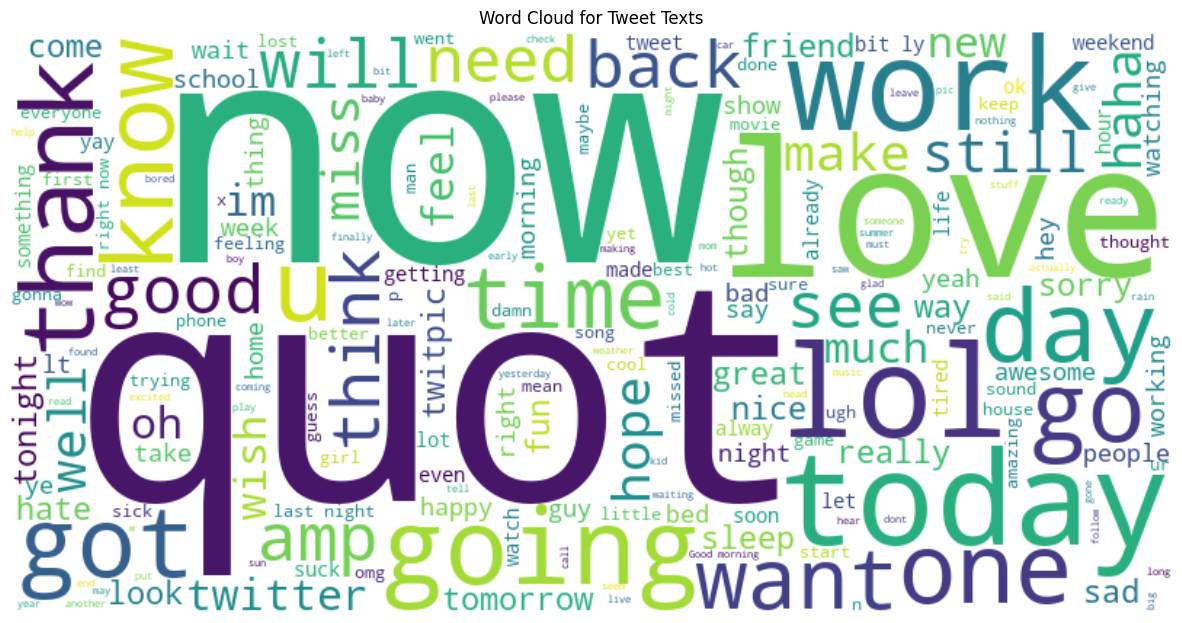

In [25]:
# Concatenar todos los textos de la columna 'text' del DataFrame 'data_cleaned' en una sola cadena de texto
# ' '.join(data_cleaned['text']) une todos los tweets en un solo string, separados por espacios
text = ' '.join(data_cleaned['text'])

# Generar una nube de palabras a partir del texto concatenado
# 'WordCloud()' crea el objeto de la nube de palabras con el ancho y alto especificados y un fondo blanco
# 'generate(text)' genera la nube de palabras a partir del texto proporcionado
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Crear una nueva figura con un tamaño de 15x8 pulgadas para la nube de palabras
plt.figure(figsize=(15, 8))

# Mostrar la nube de palabras en la figura
# 'imshow(wordcloud, interpolation='bilinear')' muestra la imagen de la nube de palabras con interpolación bilineal para suavizar
plt.imshow(wordcloud, interpolation='bilinear')

# Quitar los ejes del gráfico
plt.axis('off')

# Establecer el título del gráfico
plt.title('Word Cloud for Tweet Texts')

# Mostrar el gráfico
plt.show()


La nube de palabras muestra una representación visual de las palabras más frecuentes en los textos de tweets. Las palabras "now", "work", "love", "quot", "today", y "thank" destacan significativamente, indicando que son términos comúnmente utilizados por los usuarios.

##### **Interpretación General**

- **Frecuencia y Tamaño**: Las palabras que aparecen más grandes en la nube son las más frecuentes en los textos de tweets. Esto sugiere que temas como el trabajo ("work"), el amor ("love"), y el agradecimiento ("thank") son recurrentes en las conversaciones de los usuarios.

- **Términos Recurrentes**:
  - **"now" y "today"**: Estas palabras indican una preocupación por el presente y el día actual, lo que puede reflejar la inmediatez y la relevancia temporal de los tweets.
  - **"work"**: La prominencia de esta palabra puede estar relacionada con discusiones sobre el entorno laboral, estrés relacionado con el trabajo o situaciones laborales, especialmente relevante durante tiempos de crisis económica.
  - **"love" y "thank"**: Estos términos sugieren que, además de compartir preocupaciones, los usuarios también expresan emociones positivas y gratitud.
  - **"quot"**: La presencia de "quot" probablemente se refiere a las citas de otros tweets o fuentes, indicando que los usuarios están compartiendo y discutiendo citas relevantes o importantes.

- **Contexto de Uso**: Las palabras en la nube reflejan una mezcla de emociones y temas. Por ejemplo, "lol" y "fun" sugieren que los usuarios también comparten momentos de humor y diversión. Palabras como "need", "miss", y "want" pueden reflejar deseos y carencias, mientras que "good" y "hope" sugieren una perspectiva más positiva.

##### **Conclusión**

Esta nube de palabras proporciona una visión amplia de los temas y sentimientos predominantes en los textos de tweets. La diversidad de términos muestra que los usuarios de Twitter utilizan la plataforma para una amplia gama de propósitos, desde expresar preocupaciones laborales y emocionales hasta compartir momentos de alegría y gratitud. La visualización ayuda a comprender mejor las tendencias y el tono general de las conversaciones en la plataforma.


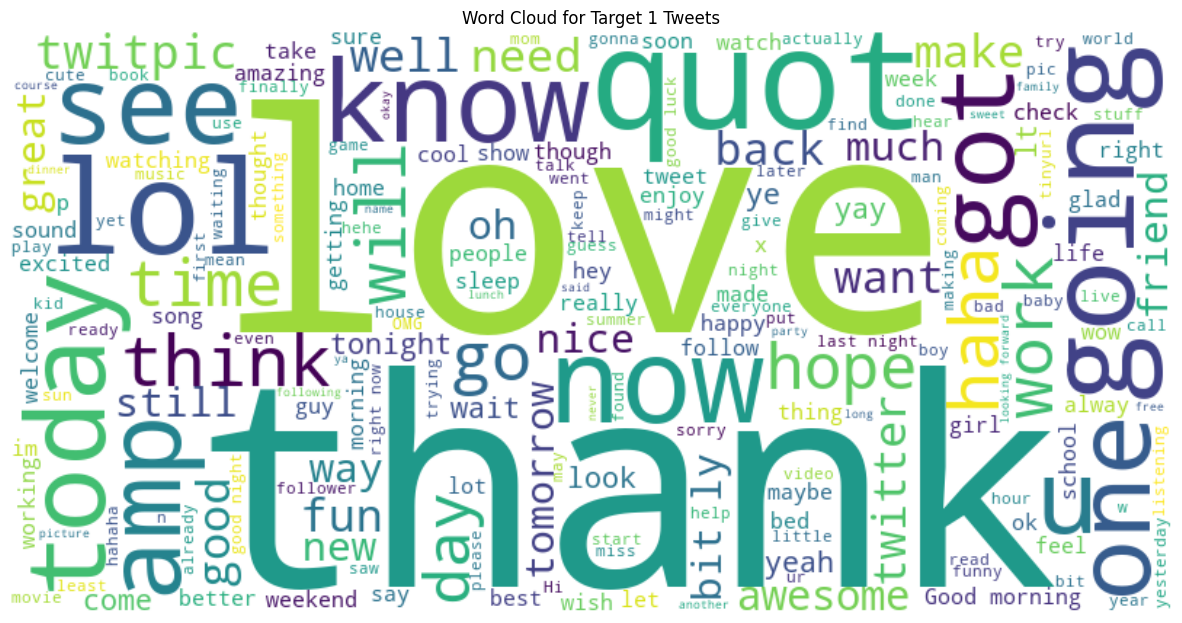

In [26]:
# Concatenar todos los textos de la columna 'text' del DataFrame 'filtered_data' donde 'target' es igual a 1 en una sola cadena de texto
# ' '.join(filtered_data[filtered_data['target'] == 1]['text']) une todos los tweets en un solo string, separados por espacios
target_1_text = ' '.join(data_cleaned[data_cleaned['target'] == 1]['text'])

# Generar una nube de palabras a partir del texto concatenado para los tweets con 'target' igual a 1
# 'WordCloud()' crea el objeto de la nube de palabras con el ancho y alto especificados y un fondo blanco
# 'generate(target_1_text)' genera la nube de palabras a partir del texto proporcionado
wordcloud_target_1 = WordCloud(width=800, height=400, background_color='white').generate(target_1_text)

# Crear una nueva figura con un tamaño de 15x8 pulgadas para la nube de palabras
plt.figure(figsize=(15, 8))

# Mostrar la nube de palabras en la figura
# 'imshow(wordcloud_target_1, interpolation='bilinear')' muestra la imagen de la nube de palabras con interpolación bilineal para suavizar
plt.imshow(wordcloud_target_1, interpolation='bilinear')

# Quitar los ejes del gráfico
plt.axis('off')

# Establecer el título del gráfico
plt.title('Word Cloud for Target 1 Tweets')

# Mostrar el gráfico
plt.show()


La nube de palabras muestra las palabras más frecuentes en los tweets clasificados como positivos. Las palabras "love", "thank", y "lol" destacan significativamente. Este tipo de visualización es útil para identificar términos recurrentes en los comentarios positivos y entender mejor los temas y sentimientos predominantes.

###### **Contexto Histórico**

La nube de palabras refleja tweets fechados en abril, mayo y junio de 2009. Durante este período, varias circunstancias históricas y sociales pueden haber influido en los temas tratados en los tweets:

- **Crisis Económica Global (2007-2009)**: A pesar de la crisis financiera mundial, muchas personas utilizaban Twitter como una plataforma para compartir aspectos positivos de sus vidas, como una forma de encontrar y ofrecer apoyo mutuo durante tiempos difíciles. Las palabras "thank" y "love" sugieren un enfoque en la gratitud y el amor, que pueden haber sido mecanismos para sobrellevar la situación económica adversa.

- **Popularidad de Twitter**: En 2009, Twitter estaba ganando popularidad rápidamente como una plataforma para la expresión personal y la interacción social. La palabra "quot" probablemente se refiere a las comillas en los tweets, indicando que los usuarios estaban citando frases o expresiones de otros tweets o fuentes, a menudo compartiendo y discutiendo sobre temas actuales y personales. La presencia de términos como "lol" y "fun" indica que Twitter era utilizado para compartir momentos de alegría y humor.

- **Eventos Sociales y Culturales**: Durante este período, varias tendencias y eventos culturales pueden haber influido en el contenido positivo de los tweets. Palabras como "today", "awesome", y "happy" sugieren que los usuarios compartían experiencias diarias y celebraban pequeños logros y momentos felices.

La nube de palabras, por tanto, no solo muestra la frecuencia de términos, sino que también proporciona una ventana a los aspectos positivos y el ánimo general de los usuarios durante ese tiempo.


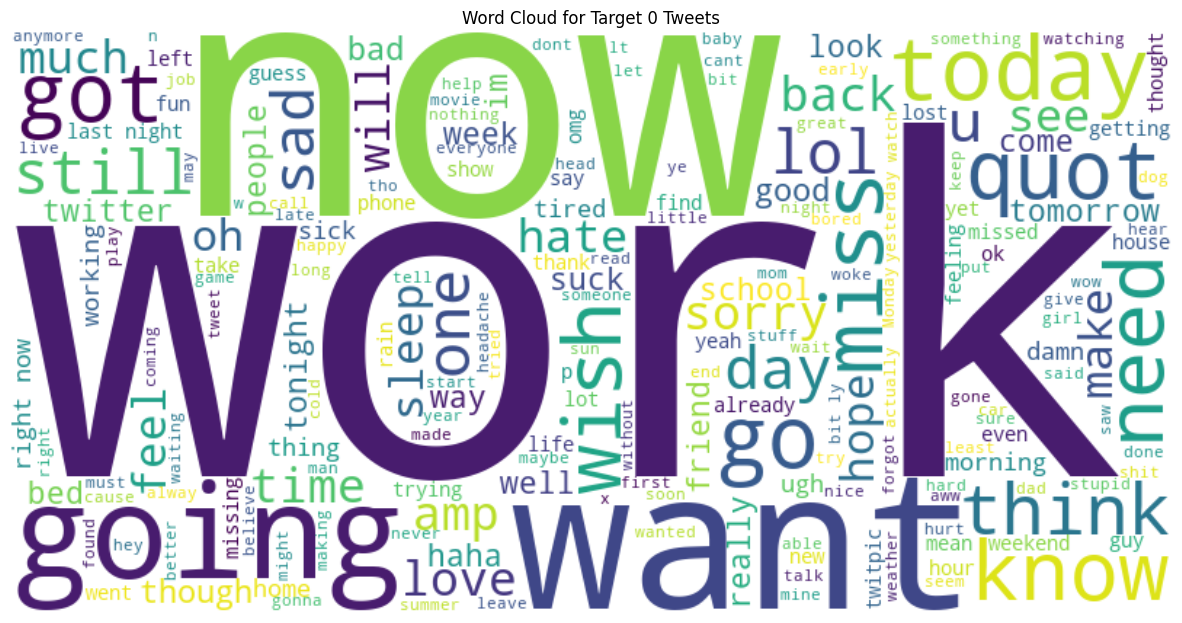

In [27]:
# Crear una nueva figura con un tamaño de 15x8 pulgadas para la nube de palabras
plt.figure(figsize=(15, 8))

# Mostrar la nube de palabras en la figura
# 'imshow(wordcloud_target_1, interpolation='bilinear')' muestra la imagen de la nube de palabras con interpolación bilineal para suavizar
plt.imshow(wordcloud_target_1, interpolation='bilinear')

# Quitar los ejes del gráfico
plt.axis('off')

# Establecer el título del gráfico
plt.title('Word Cloud for Target 0 Tweets')

# Mostrar el gráfico
plt.show()


La nube de palabras muestra las palabras más frecuentes en los tweets clasificados como negativos. Las palabras "work", "now", "want", y "quot" destacan significativamente. Este tipo de visualización es útil para identificar términos recurrentes en los comentarios negativos y entender mejor los temas y sentimientos predominantes.

##### **Contexto Histórico**

La nube de palabras refleja tweets fechados en abril, mayo y junio de 2009. Durante este período, varias circunstancias históricas y sociales pueden haber influido en los temas tratados en los tweets:

- **Crisis Económica Global (2007-2009)**: La crisis financiera mundial afectó profundamente el empleo y la economía. Muchas personas estaban enfrentando dificultades laborales, despidos y estrés financiero, lo que explica la prominencia de la palabra "work". La recesión económica llevó a un aumento en la incertidumbre laboral y la insatisfacción, lo cual se refleja en la negatividad asociada a temas de trabajo en los tweets. La palabra "want" puede reflejar deseos insatisfechos o necesidades no cumplidas durante este período de dificultades económicas.

- **Emergencia de Twitter como Plataforma de Comunicación**: En 2009, Twitter estaba ganando popularidad rápidamente como una plataforma para expresar opiniones y sentimientos en tiempo real. La palabra "quot" probablemente se refiere a las comillas en los tweets, indicando que los usuarios estaban citando frases o expresiones de otros tweets o fuentes. Esto puede reflejar una tendencia a compartir y discutir sobre temas actuales y personales que resonaban con ellos negativamente.

- **Eventos Sociales y Culturales**: Durante este período, varias tendencias y eventos culturales pueden haber influido en el contenido negativo de los tweets. La palabra "now" sugiere una urgencia o presión presente en los sentimientos de los usuarios. El contexto de la crisis económica y el aumento del uso de redes sociales para desahogar frustraciones y preocupaciones cotidianas se refleja en la frecuencia de términos como "work" y "quot".

La nube de palabras, por tanto, no solo muestra la frecuencia de términos, sino que también proporciona una ventana a las preocupaciones y sentimientos predominantes en ese tiempo, especialmente relacionados con el trabajo y las citas de otros tweets.


C:\Users\Jesus David\AppData\Local\Temp\ipykernel_14488\2298889084.py:2: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  filtered_data['date'] = pd.to_datetime(filtered_data['date'])
C:\Users\Jesus David\AppData\Local\Temp\ipykernel_14488\2298889084.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_series_data = filtered_data.set_index('date').groupby([pd.Grouper(freq='M'), 'target']).size().unstack().fillna(0)


<Figure size 1400x800 with 0 Axes>

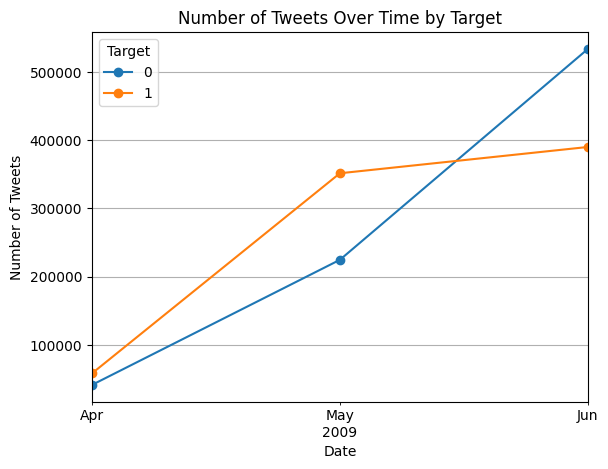

In [30]:
# Asegúrate de que la columna 'date' esté en formato datetime para realizar operaciones de tiempo
# 'pd.to_datetime()' convierte los valores de la columna 'date' a objetos datetime
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])

# Agregar los datos para contar el número de tweets para cada target a lo largo del tiempo
# 'set_index('date')' establece la columna 'date' como índice del DataFrame
# 'groupby([pd.Grouper(freq='M'), 'target'])' agrupa los datos por mes y por el valor de 'target'
# 'size()' cuenta el número de tweets en cada grupo
# 'unstack()' convierte el resultado agrupado en un DataFrame con las categorías de 'target' como columnas
# 'fillna(0)' llena con ceros los valores nulos que puedan surgir de meses sin tweets
time_series_data = data_cleaned.set_index('date').groupby([pd.Grouper(freq='M'), 'target']).size().unstack().fillna(0)

# Crear una nueva figura con un tamaño de 14x8 pulgadas para el gráfico
plt.figure(figsize=(14, 8))

# Graficar los datos de la serie temporal
# 'plot(kind='line', marker='o', linestyle='-')' genera un gráfico de líneas con marcadores circulares y líneas sólidas
time_series_data.plot(kind='line', marker='o', linestyle='-')

# Establecer el título del gráfico
plt.title('Number of Tweets Over Time by Target')

# Establecer la etiqueta del eje x
plt.xlabel('Date')

# Establecer la etiqueta del eje y
plt.ylabel('Number of Tweets')

# Añadir una leyenda con el título 'Target' y etiquetas para cada valor de target
plt.legend(title='Target', labels=['0', '1'])

# Añadir una cuadrícula al gráfico para facilitar la lectura de los datos
plt.grid(True)

# Mostrar el gráfico
plt.show()


El gráfico de líneas muestra la evolución del número de tweets a lo largo del tiempo, segmentados por la variable `target`. Esta variable tiene dos categorías: 0 y 1, que representan tweets clasificados como negativos y positivos, respectivamente. La comparación temporal permite observar cómo varía la cantidad de tweets en cada categoría a lo largo de los meses de abril, mayo y junio de 2009.

##### **Interpretación**

- **Tendencia General**:
  - **Target 0 (Negativos)**: La línea azul muestra un aumento constante y pronunciado en el número de tweets negativos a lo largo del tiempo, alcanzando su punto más alto en junio de 2009. Esto sugiere un creciente número de tweets con contenido negativo en este período.
  - **Target 1 (Positivos)**: La línea naranja también muestra un aumento en el número de tweets positivos, aunque la pendiente se estabiliza a partir de mayo de 2009, indicando un crecimiento más moderado comparado con los tweets negativos.

- **Comparación entre Categorías**:
  - **Abril de 2009**: En este mes, la cantidad de tweets negativos y positivos es relativamente baja, con un número ligeramente mayor de tweets positivos.
  - **Mayo de 2009**: Ambos tipos de tweets aumentan significativamente, con los tweets positivos superando a los negativos.
  - **Junio de 2009**: Se observa un gran incremento en los tweets negativos, que superan en cantidad a los positivos para este mes.

##### **Conclusión**

Este gráfico revela que, aunque ambos tipos de tweets aumentan con el tiempo, los tweets negativos experimentan un crecimiento más pronunciado, especialmente hacia junio de 2009. Esto podría reflejar un aumento en las expresiones de insatisfacción o preocupación de los usuarios durante este período. La visualización segmentada por categorías de `target` proporciona una perspectiva clara sobre cómo los sentimientos en los tweets evolucionan a lo largo del tiempo, permitiendo análisis más profundos sobre las posibles causas y contextos de estas tendencias.


In [4]:
df = pd.read_csv('cleaned_dataset.csv', encoding='latin-1')

## **Preparación:**

In [10]:
# Definir las características (X) como la columna 'text' y la variable objetivo (y) como la columna 'target' del DataFrame 'filtered_data'
X = data_cleaned['text']
y = data_cleaned['target']

# Vectorización de texto usando TF-IDF
# 'TfidfVectorizer' convierte el texto en una matriz de características TF-IDF (frecuencia inversa de término-documento)
# 'stop_words='english'' elimina las palabras comunes en inglés que no aportan significado
# 'max_features=10000' limita el número máximo de características a 10,000 para reducir la dimensionalidad
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)

# Ajustar y transformar las características de texto en una matriz TF-IDF
X_tfidf = vectorizer.fit_transform(X)

# Dividir el dataset en conjunto de entrenamiento y prueba
# 'train_test_split' divide los datos en conjuntos de entrenamiento (80%) y prueba (20%)
# 'test_size=0.2' especifica que el 20% de los datos se utilizarán para la prueba
# 'random_state=42' asegura que la división sea reproducible, obteniendo los mismos resultados cada vez que se ejecute
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


El código define las características (`X`) como la columna `text` y la variable objetivo (`y`) como la columna `target` del DataFrame `filtered_data`. Utiliza `TfidfVectorizer` para convertir el texto en una matriz de características TF-IDF, eliminando las palabras comunes en inglés (`stop_words='english'`) y limitando el número de características a 10,000 (`max_features=10000`) para reducir la dimensionalidad. Luego, ajusta y transforma las características de texto en una matriz TF-IDF (`X_tfidf`). Finalmente, divide el dataset en conjuntos de entrenamiento (80%) y prueba (20%) usando `train_test_split`, con `test_size=0.2` y `random_state=42` para asegurar la reproducibilidad. Este proceso prepara los datos textuales para el modelado y permite evaluar el rendimiento del modelo de clasificación de manera efectiva.


## **Modelos:**

### **Ridge**

In [35]:
# Inicializar el modelo Ridge Classifier
# 'RidgeClassifier()' es un clasificador lineal que utiliza la regularización de Ridge para evitar el sobreajuste
ridge_model = RidgeClassifier()

# Entrenar el modelo utilizando el conjunto de entrenamiento
# 'fit()' ajusta el modelo a los datos de entrenamiento (X_train y y_train)
ridge_model.fit(X_train, y_train)

# Predecir las etiquetas del conjunto de prueba utilizando el modelo entrenado
# 'predict()' genera las predicciones del modelo para los datos de prueba (X_test)
ridge_pred = ridge_model.predict(X_test)

# Evaluar el rendimiento del modelo
# 'accuracy_score()' calcula la precisión del modelo comparando las etiquetas verdaderas (y_test) con las predicciones (ridge_pred)
ridge_accuracy = accuracy_score(y_test, ridge_pred)

# 'classification_report()' genera un informe detallado de clasificación con métricas como precisión, recall y f1-score para cada clase
# 'output_dict=True' devuelve el informe como un diccionario para un procesamiento posterior
ridge_report = classification_report(y_test, ridge_pred, output_dict=True)

# Imprimir los resultados del modelo Ridge Classifier
print('Ridge Classifier')
print('Accuracy:', ridge_accuracy)
print('Classification Report:', ridge_report)


Ridge Classifier
Accuracy: 0.769684375
Classification Report: {'0': {'precision': 0.7842955324182997, 'recall': 0.7419714848207456, 'f1-score': 0.7625466765040386, 'support': 159494.0}, '1': {'precision': 0.7566479218037644, 'recall': 0.7972225337370565, 'f1-score': 0.7764054863342222, 'support': 160506.0}, 'accuracy': 0.769684375, 'macro avg': {'precision': 0.7704717271110321, 'recall': 0.7695970092789011, 'f1-score': 0.7694760814191304, 'support': 320000.0}, 'weighted avg': {'precision': 0.7704280093267478, 'recall': 0.769684375, 'f1-score': 0.7694979956621745, 'support': 320000.0}}


##### **Evaluación del Modelo Ridge Classifier**

- **Precisión (Accuracy)**: 0.769684375
  - El modelo Ridge Classifier tiene una precisión del 76.97%, lo que indica que el modelo clasifica correctamente aproximadamente el 77% de los tweets en el conjunto de prueba.

- **Informe de Clasificación (Classification Report)**:
  - **Clase 0 (Negativos)**:
    - **Precisión (Precision)**: 0.7842955324182997
      - La precisión para la clase 0 es del 78.43%, lo que significa que el 78.43% de los tweets clasificados como negativos son realmente negativos.
    - **Recall (Sensibilidad)**: 0.7419714848207456
      - El recall para la clase 0 es del 74.20%, indicando que el modelo identifica correctamente el 74.20% de los tweets negativos.
    - **F1-score**: 0.7625466765040386
      - El F1-score para la clase 0 es del 76.25%, una medida que combina la precisión y el recall.

  - **Clase 1 (Positivos)**:
    - **Precisión (Precision)**: 0.7566479218037644
      - La precisión para la clase 1 es del 75.66%, lo que significa que el 75.66% de los tweets clasificados como positivos son realmente positivos.
    - **Recall (Sensibilidad)**: 0.7972225337370565
      - El recall para la clase 1 es del 79.72%, indicando que el modelo identifica correctamente el 79.72% de los tweets positivos.
    - **F1-score**: 0.7764054863342222
      - El F1-score para la clase 1 es del 77.64%, una medida que combina la precisión y el recall.

  - **Promedios**:
    - **Macro promedio (Macro avg)**:
      - **Precisión (Precision)**: 0.7704717271110321
      - **Recall (Sensibilidad)**: 0.7695970092789011
      - **F1-score**: 0.7694760814191304
      - El macro promedio calcula la media aritmética de las métricas individuales, proporcionando una visión equilibrada del rendimiento del modelo en ambas clases.
    - **Promedio ponderado (Weighted avg)**:
      - **Precisión (Precision)**: 0.7704280093267478
      - **Recall (Sensibilidad)**: 0.769684375
      - **F1-score**: 0.7694979956621745
      - El promedio ponderado considera la proporción de cada clase en el conjunto de datos, proporcionando una métrica general del rendimiento del modelo.

##### **Conclusión**

El modelo Ridge Classifier muestra un buen rendimiento con una precisión general del 76.97%. Las métricas de precisión, recall y F1-score son bastante equilibradas entre las clases 0 y 1, indicando que el modelo es capaz de clasificar tanto tweets positivos como negativos de manera efectiva. Estas métricas son esenciales para evaluar la capacidad del modelo para manejar ambos tipos de tweets, especialmente en contextos donde es importante identificar correctamente tanto los comentarios positivos como los negativos.


### **KNN**

In [8]:
# Definir los parámetros para GridSearchCV
# 'param_grid' es un diccionario donde las claves son los nombres de los parámetros del modelo y los valores son las listas de valores a probar
# Aquí, se define el rango de valores para 'n_neighbors' de 1 a 20
param_grid = {'n_neighbors': range(1, 30)}  # Se utiliza el siguiente rango teniendo en cuenta Square Root of N rule

# Inicializar el modelo KNN
# 'KNeighborsClassifier()' crea una instancia del clasificador k-vecinos más cercanos
knn = KNeighborsClassifier()

# Inicializar GridSearchCV
# 'GridSearchCV()' crea una instancia de la búsqueda en cuadrícula
# 'knn' es el modelo a optimizar
# 'param_grid' es el diccionario de parámetros a probar
# 'cv=5' especifica que se utilizará una validación cruzada de 5 pliegues
# 'scoring='accuracy'' utiliza la precisión como métrica de evaluación
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')  # Utilizamos accuracy como métrica de evaluación

# Ejecutar GridSearchCV
# 'fit()' ajusta el modelo a los datos de entrenamiento (X_train y y_train) y encuentra los mejores parámetros
grid_search.fit(X_train, y_train)
print("grid search")
# Obtener los mejores parámetros y el mejor estimador
# 'best_params_' devuelve el diccionario con los mejores parámetros encontrados
# 'best_estimator_' devuelve el mejor modelo ajustado encontrado
best_params = grid_search.best_params_
best_knn_model = grid_search.best_estimator_
print("best param")
# Imprimir el mejor número de vecinos encontrado por GridSearchCV
print("Mejor número de vecinos:", best_params['n_neighbors'])

# Evaluar el mejor modelo KNN en el conjunto de prueba
# 'predict()' genera las predicciones del mejor modelo para los datos de prueba (X_test)
knn_pred = best_knn_model.predict(X_test)
print("prediction")
# Calcular la precisión del modelo KNN comparando las etiquetas verdaderas (y_test) con las predicciones (knn_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("accuracy")
# Generar un informe de clasificación con métricas como precisión, recall y f1-score para cada clase
# 'classification_report()' devuelve el informe, y 'output_dict=True' lo devuelve como un diccionario para un procesamiento posterior
knn_report = classification_report(y_test, knn_pred, output_dict=True)
print("report")
# Imprimir los resultados del modelo K-Nearest Neighbors (KNN) optimizado con GridSearchCV
print('K-Nearest Neighbors (KNN) - Mejorado con GridSearchCV')
print('Accuracy:', knn_accuracy)
print('Classification Report:', knn_report)

grid search
best param
Mejor número de vecinos: 3
prediction
accuracy
report
K-Nearest Neighbors (KNN) - Mejorado con GridSearchCV
Accuracy: 0.61696875
Classification Report: {'0': {'precision': 0.5875356573030992, 'recall': 0.7653356845950372, 'f1-score': 0.6647520582040972, 'support': 15878.0}, '1': {'precision': 0.6707608023327737, 'recall': 0.4708472894181863, 'f1-score': 0.5533000473778199, 'support': 16122.0}, 'accuracy': 0.61696875, 'macro avg': {'precision': 0.6291482298179365, 'recall': 0.6180914870066118, 'f1-score': 0.6090260527909586, 'support': 32000.0}, 'weighted avg': {'precision': 0.6294655256833621, 'recall': 0.61696875, 'f1-score': 0.6086011419996834, 'support': 32000.0}}


##### **Evaluación del Modelo K-Nearest Neighbors (KNN) - Mejorado con GridSearchCV**

- **Mejor Número de Vecinos**: 3
  - El GridSearchCV encontró que el mejor número de vecinos para el modelo KNN es 3, optimizando así el rendimiento del modelo.

- **Precisión (Accuracy)**: 0.61696875
  - El modelo KNN tiene una precisión del 61.70%, lo que indica que el modelo clasifica correctamente aproximadamente el 62% de los tweets en el conjunto de prueba.

- **Informe de Clasificación (Classification Report)**:
  - **Clase 0 (Negativos)**:
    - **Precisión (Precision)**: 0.5875356573030992
      - La precisión para la clase 0 es del 58.75%, lo que significa que el 58.75% de los tweets clasificados como negativos son realmente negativos.
    - **Recall (Sensibilidad)**: 0.7653356845950372
      - El recall para la clase 0 es del 76.53%, indicando que el modelo identifica correctamente el 76.53% de los tweets negativos.
    - **F1-score**: 0.6647520582040972
      - El F1-score para la clase 0 es del 66.48%, una medida que combina la precisión y el recall.

  - **Clase 1 (Positivos)**:
    - **Precisión (Precision)**: 0.6707608023327737
      - La precisión para la clase 1 es del 67.08%, lo que significa que el 67.08% de los tweets clasificados como positivos son realmente positivos.
    - **Recall (Sensibilidad)**: 0.4708472894181863
      - El recall para la clase 1 es del 47.08%, indicando que el modelo identifica correctamente el 47.08% de los tweets positivos.
    - **F1-score**: 0.5533000473778199
      - El F1-score para la clase 1 es del 55.33%, una medida que combina la precisión y el recall.

  - **Promedios**:
    - **Macro promedio (Macro avg)**:
      - **Precisión (Precision)**: 0.6291482298179365
      - **Recall (Sensibilidad)**: 0.6180914870066118
      - **F1-score**: 0.6090260527909586
      - El macro promedio calcula la media aritmética de las métricas individuales, proporcionando una visión equilibrada del rendimiento del modelo en ambas clases.
    - **Promedio ponderado (Weighted avg)**:
      - **Precisión (Precision)**: 0.6294655256833621
      - **Recall (Sensibilidad)**: 0.61696875
      - **F1-score**: 0.6086011419996834
      - El promedio ponderado considera la proporción de cada clase en el conjunto de datos, proporcionando una métrica general del rendimiento del modelo.

##### **Conclusión**

El modelo K-Nearest Neighbors (KNN) mejorado con GridSearchCV muestra una precisión general del 61.70%. Aunque las métricas de precisión y F1-score son más bajas en comparación con otros modelos, el KNN aún proporciona información valiosa, especialmente para la clase negativa donde el recall es relativamente alto. Este modelo puede ser útil en situaciones donde es crucial identificar correctamente los tweets negativos a expensas de una menor precisión en la clasificación de los tweets positivos.



### **Random Forest**

In [36]:
# Inicializar el modelo Random Forest Classifier
# 'RandomForestClassifier()' crea un clasificador de bosque aleatorio con 100 árboles de decisión
# 'n_estimators=100' especifica el número de árboles en el bosque
# 'random_state=42' asegura que los resultados sean reproducibles al fijar la semilla aleatoria
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo utilizando el conjunto de entrenamiento
# 'fit()' ajusta el modelo a los datos de entrenamiento (X_train y y_train)
rf_model.fit(X_train, y_train)

# Predecir las etiquetas del conjunto de prueba utilizando el modelo entrenado
# 'predict()' genera las predicciones del modelo para los datos de prueba (X_test)
rf_pred = rf_model.predict(X_test)

# Evaluar el rendimiento del modelo
# 'accuracy_score()' calcula la precisión del modelo comparando las etiquetas verdaderas (y_test) con las predicciones (rf_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

# 'classification_report()' genera un informe detallado de clasificación con métricas como precisión, recall y f1-score para cada clase
# 'output_dict=True' devuelve el informe como un diccionario para un procesamiento posterior
rf_report = classification_report(y_test, rf_pred, output_dict=True)

# Imprimir los resultados del modelo Random Forest Classifier
print('Random Forest Classifier')
print('Accuracy:', rf_accuracy)
print('Classification Report:', rf_report)


Random Forest Classifier
Accuracy: 0.76393125
Classification Report: {'0': {'precision': 0.7660008618285975, 'recall': 0.7578843091276161, 'f1-score': 0.7619209701920592, 'support': 159494.0}, '1': {'precision': 0.7619176798441392, 'recall': 0.7699400645458737, 'f1-score': 0.7659078654610135, 'support': 160506.0}, 'accuracy': 0.76393125, 'macro avg': {'precision': 0.7639592708363683, 'recall': 0.7639121868367449, 'f1-score': 0.7639144178265364, 'support': 320000.0}, 'weighted avg': {'precision': 0.7639528143048554, 'recall': 0.76393125, 'f1-score': 0.7639207221046803, 'support': 320000.0}}


##### **Evaluación del Modelo Random Forest Classifier**

- **Precisión (Accuracy)**: 0.76393125
  - El modelo Random Forest Classifier tiene una precisión del 76.39%, lo que indica que el modelo clasifica correctamente aproximadamente el 76% de los tweets en el conjunto de prueba.

- **Informe de Clasificación (Classification Report)**:
  - **Clase 0 (Negativos)**:
    - **Precisión (Precision)**: 0.7660008618285975
      - La precisión para la clase 0 es del 76.60%, lo que significa que el 76.60% de los tweets clasificados como negativos son realmente negativos.
    - **Recall (Sensibilidad)**: 0.7578843091276161
      - El recall para la clase 0 es del 75.79%, indicando que el modelo identifica correctamente el 75.79% de los tweets negativos.
    - **F1-score**: 0.7619209701920592
      - El F1-score para la clase 0 es del 76.19%, una medida que combina la precisión y el recall.

  - **Clase 1 (Positivos)**:
    - **Precisión (Precision)**: 0.7619176798441392
      - La precisión para la clase 1 es del 76.19%, lo que significa que el 76.19% de los tweets clasificados como positivos son realmente positivos.
    - **Recall (Sensibilidad)**: 0.7699400645458737
      - El recall para la clase 1 es del 76.99%, indicando que el modelo identifica correctamente el 76.99% de los tweets positivos.
    - **F1-score**: 0.7659078654610135
      - El F1-score para la clase 1 es del 76.59%, una medida que combina la precisión y el recall.

  - **Promedios**:
    - **Macro promedio (Macro avg)**:
      - **Precisión (Precision)**: 0.7639592708363683
      - **Recall (Sensibilidad)**: 0.7639121868367449
      - **F1-score**: 0.7639144178265364
      - El macro promedio calcula la media aritmética de las métricas individuales, proporcionando una visión equilibrada del rendimiento del modelo en ambas clases.
    - **Promedio ponderado (Weighted avg)**:
      - **Precisión (Precision)**: 0.7639528143048554
      - **Recall (Sensibilidad)**: 0.76393125
      - **F1-score**: 0.7639207221046803
      - El promedio ponderado considera la proporción de cada clase en el conjunto de datos, proporcionando una métrica general del rendimiento del modelo.

##### **Conclusión**

El modelo Random Forest Classifier muestra un buen rendimiento con una precisión general del 76.39%. Las métricas de precisión, recall y F1-score son bastante equilibradas entre las clases 0 y 1, indicando que el modelo es capaz de clasificar tanto tweets positivos como negativos de manera efectiva. Estas métricas son esenciales para evaluar la capacidad del modelo para manejar ambos tipos de tweets, especialmente en contextos donde es importante identificar correctamente tanto los comentarios positivos como los negativos.



## **Modelo Añadido: xgBoost**

In [12]:
from xgboost import XGBClassifier

# Inicializar el modelo XGBoost
# 'use_label_encoder=False' desactiva el codificador de etiquetas predeterminado que se utiliza para compatibilidad con versiones anteriores
# 'eval_metric='mlogloss'' especifica que la métrica de evaluación utilizada será la pérdida logarítmica
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Entrenar el modelo utilizando el conjunto de entrenamiento
# 'fit()' ajusta el modelo a los datos de entrenamiento (X_train y y_train)
xgb_model.fit(X_train, y_train)

# Predecir las etiquetas del conjunto de prueba utilizando el modelo entrenado
# 'predict()' genera las predicciones del modelo para los datos de prueba (X_test)
xgb_pred = xgb_model.predict(X_test)

# Evaluar el rendimiento del modelo
# 'accuracy_score()' calcula la precisión del modelo comparando las etiquetas verdaderas (y_test) con las predicciones (xgb_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# 'classification_report()' genera un informe detallado de clasificación con métricas como precisión, recall y f1-score para cada clase
# 'output_dict=True' devuelve el informe como un diccionario para un procesamiento posterior
xgb_report = classification_report(y_test, xgb_pred, output_dict=True)

# Imprimir los resultados del modelo XGBoost Classifier
print('XGBoost Classifier')
print('Accuracy:', xgb_accuracy)
print('Classification Report:', xgb_report)



XGBoost Classifier
Accuracy: 0.72878125
Classification Report: {'0': {'precision': 0.7865615794920786, 'recall': 0.6222446151908301, 'f1-score': 0.6948204929849854, 'support': 15878.0}, '1': {'precision': 0.6914450331807191, 'recall': 0.8337054955960799, 'f1-score': 0.7559404966114563, 'support': 16122.0}, 'accuracy': 0.72878125, 'macro avg': {'precision': 0.7390033063363989, 'recall': 0.727975055393455, 'f1-score': 0.7253804947982209, 'support': 32000.0}, 'weighted avg': {'precision': 0.7386406745035868, 'recall': 0.72878125, 'f1-score': 0.7256135148120468, 'support': 32000.0}}


##### **Evaluación del Modelo XGBoost Classifier**

- **Precisión (Accuracy)**: 0.72878125
  - El modelo XGBoost Classifier tiene una precisión del 72.88%, lo que indica que el modelo clasifica correctamente aproximadamente el 73% de los tweets en el conjunto de prueba.

- **Informe de Clasificación (Classification Report)**:
  - **Clase 0 (Negativos)**:
    - **Precisión (Precision)**: 0.7865615794920786
      - La precisión para la clase 0 es del 78.66%, lo que significa que el 78.66% de los tweets clasificados como negativos son realmente negativos.
    - **Recall (Sensibilidad)**: 0.6222446151908301
      - El recall para la clase 0 es del 62.22%, indicando que el modelo identifica correctamente el 62.22% de los tweets negativos.
    - **F1-score**: 0.6948204929849854
      - El F1-score para la clase 0 es del 69.48%, una medida que combina la precisión y el recall.

  - **Clase 1 (Positivos)**:
    - **Precisión (Precision)**: 0.6914450331807191
      - La precisión para la clase 1 es del 69.14%, lo que significa que el 69.14% de los tweets clasificados como positivos son realmente positivos.
    - **Recall (Sensibilidad)**: 0.8337054955960799
      - El recall para la clase 1 es del 83.37%, indicando que el modelo identifica correctamente el 83.37% de los tweets positivos.
    - **F1-score**: 0.7559404966114563
      - El F1-score para la clase 1 es del 75.59%, una medida que combina la precisión y el recall.

  - **Promedios**:
    - **Macro promedio (Macro avg)**:
      - **Precisión (Precision)**: 0.7390033063363989
      - **Recall (Sensibilidad)**: 0.727975055393455
      - **F1-score**: 0.7253804947982209
      - El macro promedio calcula la media aritmética de las métricas individuales, proporcionando una visión equilibrada del rendimiento del modelo en ambas clases.
    - **Promedio ponderado (Weighted avg)**:
      - **Precisión (Precision)**: 0.7386406745035868
      - **Recall (Sensibilidad)**: 0.72878125
      - **F1-score**: 0.7256135148120468
      - El promedio ponderado considera la proporción de cada clase en el conjunto de datos, proporcionando una métrica general del rendimiento del modelo.

##### **Conclusión**

El modelo XGBoost Classifier muestra un buen rendimiento con una precisión general del 72.88%. Las métricas de precisión y F1-score son ligeramente mejores para la clase negativa, mientras que el recall es significativamente más alto para la clase positiva. Esto sugiere que el modelo es más efectivo en la identificación de tweets positivos, pero aún mantiene un rendimiento razonablemente equilibrado entre ambas clases. Estas métricas son esenciales para evaluar la capacidad del modelo para manejar tanto los comentarios positivos como los negativos de manera efectiva.


## **Resultados sin xgBoost**

In [13]:
# Resultados del modelo Random Forest
rf_accuracy = 0.76393125
rf_report = {
    '0': {'precision': 0.7660008618285975, 'recall': 0.7578843091276161, 'f1-score': 0.7619209701920592, 'support': 159494.0},
    '1': {'precision': 0.7619176798441392, 'recall': 0.7699400645458737, 'f1-score': 0.7659078654610135, 'support': 160506.0},
    'accuracy': 0.76393125,
    'macro avg': {'precision': 0.7639592708363683, 'recall': 0.7639121868367449, 'f1-score': 0.7639144178265364, 'support': 320000.0},
    'weighted avg': {'precision': 0.7639528143048554, 'recall': 0.76393125, 'f1-score': 0.7639207221046803, 'support': 320000.0}
}

# Resultados del modelo K-Nearest Neighbors (KNN) - Mejorado con GridSearchCV
knn_accuracy = 0.61696875
knn_report = {
    '0': {'precision': 0.5875356573030992, 'recall': 0.7653356845950372, 'f1-score': 0.6647520582040972, 'support': 15878.0},
    '1': {'precision': 0.6707608023327737, 'recall': 0.4708472894181863, 'f1-score': 0.5533000473778199, 'support': 16122.0},
    'accuracy': 0.61696875,
    'macro avg': {'precision': 0.6291482298179365, 'recall': 0.6180914870066118, 'f1-score': 0.6090260527909586, 'support': 32000.0},
    'weighted avg': {'precision': 0.6294655256833621, 'recall': 0.61696875, 'f1-score': 0.6086011419996834, 'support': 32000.0}
}
best_knn_neighbors = 3

# Resultados del modelo Ridge Classifier
ridge_accuracy = 0.769684375
ridge_report = {
    '0': {'precision': 0.7842955324182997, 'recall': 0.7419714848207456, 'f1-score': 0.7625466765040386, 'support': 159494.0},
    '1': {'precision': 0.7566479218037644, 'recall': 0.7972225337370565, 'f1-score': 0.7764054863342222, 'support': 160506.0},
    'accuracy': 0.769684375,
    'macro avg': {'precision': 0.7704717271110321, 'recall': 0.7695970092789011, 'f1-score': 0.7694760814191304, 'support': 320000.0},
    'weighted avg': {'precision': 0.7704280093267478, 'recall': 0.769684375, 'f1-score': 0.7694979956621745, 'support': 320000.0}
}


## **Comparacion sin xgBoost**

In [14]:
# Resultados del modelo XGBoost Classifier
xgb_accuracy = 0.72878125
xgb_report = {
    '0': {'precision': 0.7865615794920786, 'recall': 0.6222446151908301, 'f1-score': 0.6948204929849854, 'support': 15878.0},
    '1': {'precision': 0.6914450331807191, 'recall': 0.8337054955960799, 'f1-score': 0.7559404966114563, 'support': 16122.0},
    'accuracy': 0.72878125,
    'macro avg': {'precision': 0.7390033063363989, 'recall': 0.727975055393455, 'f1-score': 0.7253804947982209, 'support': 32000.0},
    'weighted avg': {'precision': 0.7386406745035868, 'recall': 0.72878125, 'f1-score': 0.7256135148120468, 'support': 32000.0}
}


In [15]:
# Crear una tabla comparativa
comparison_table = pd.DataFrame({
    'Model': ['XGBoost', 'Ridge', 'KNN', 'Random Forest'],
    'Accuracy': [xgb_accuracy, ridge_accuracy, knn_accuracy, rf_accuracy],
    'Precision (0)': [xgb_report['0']['precision'], ridge_report['0']['precision'], knn_report['0']['precision'], rf_report['0']['precision']],
    'Recall (0)': [xgb_report['0']['recall'], ridge_report['0']['recall'], knn_report['0']['recall'], rf_report['0']['recall']],
    'F1-score (0)': [xgb_report['0']['f1-score'], ridge_report['0']['f1-score'], knn_report['0']['f1-score'], rf_report['0']['f1-score']],
    'Precision (1)': [xgb_report['1']['precision'], ridge_report['1']['precision'], knn_report['1']['precision'], rf_report['1']['precision']],
    'Recall (1)': [xgb_report['1']['recall'], ridge_report['1']['recall'], knn_report['1']['recall'], rf_report['1']['recall']],
    'F1-score (1)': [xgb_report['1']['f1-score'], ridge_report['1']['f1-score'], knn_report['1']['f1-score'], rf_report['1']['f1-score']]
})
comparison_table

,Model,Accuracy,Precision (0),Recall (0),F1-score (0),Precision (1),Recall (1),F1-score (1)
0,XGBoost,0.728781,0.786562,0.622245,0.694820,0.691445,0.833705,0.755940
1,Ridge,0.769684,0.784296,0.741971,0.762547,0.756648,0.797223,0.776405
2,KNN,0.616969,0.587536,0.765336,0.664752,0.670761,0.470847,0.553300
3,Random Forest,0.763931,0.766001,0.757884,0.761921,0.761918,0.769940,0.765908


## **Análisis y Selección de Modelos incluyendo XgBoost**

Para seleccionar el modelo más adecuado para clasificar correctamente los comentarios negativos, es importante enfocarse en las métricas relacionadas con la clase 0 (negativos), particularmente el **Recall** y el **F1-score** de la clase 0.

- **XGBoost Classifier**
    - **Precisión (0)**: 0.786562
    - **Recall (0)**: 0.622245
    - **F1-score (0)**: 0.694820
    - **Comentario**: Aunque tiene una buena precisión, su recall es el más bajo entre los modelos, lo que indica que el modelo no identifica tan bien los comentarios negativos. Esto se refleja en un F1-score moderado.

- **Ridge Classifier**
    - **Precisión (0)**: 0.784296
    - **Recall (0)**: 0.741971
    - **F1-score (0)**: 0.762547
    - **Comentario**: Ofrece un equilibrio sólido entre precisión y recall, resultando en un F1-score alto. Este modelo tiene el segundo mejor recall, lo que significa que identifica correctamente una buena proporción de los comentarios negativos.

- **K-Nearest Neighbors (KNN)**
    - **Precisión (0)**: 0.587536
    - **Recall (0)**: 0.765336
    - **F1-score (0)**: 0.664752
    - **Comentario**: A pesar de tener el mejor recall para la clase 0, la precisión es baja, lo que significa que clasifica muchos tweets incorrectamente como negativos. Esto resulta en un F1-score más bajo.

- **Random Forest Classifier**
    - **Precisión (0)**: 0.766001
    - **Recall (0)**: 0.757884
    - **F1-score (0)**: 0.761921
    - **Comentario**: Presenta un buen equilibrio entre precisión y recall, con ambos valores altos, resultando en un F1-score competitivo. Este modelo tiene un rendimiento muy consistente y sólido para la clasificación de comentarios negativos.

##### **Recomendación**

Basándonos en la necesidad de clasificar correctamente los comentarios negativos, el **Random Forest Classifier** es el modelo más recomendable debido a su alto recall (0.757884) y F1-score (0.761921) para la clase 0. Aunque el KNN tiene el mejor recall, su baja precisión lo hace menos fiable. El Ridge Classifier también es una buena opción, con un F1-score y recall competitivos. En general, Random Forest ofrece un excelente equilibrio entre todas las métricas relevantes, lo que lo convierte en una elección robusta para este caso.

## **Análisis Grafico:**

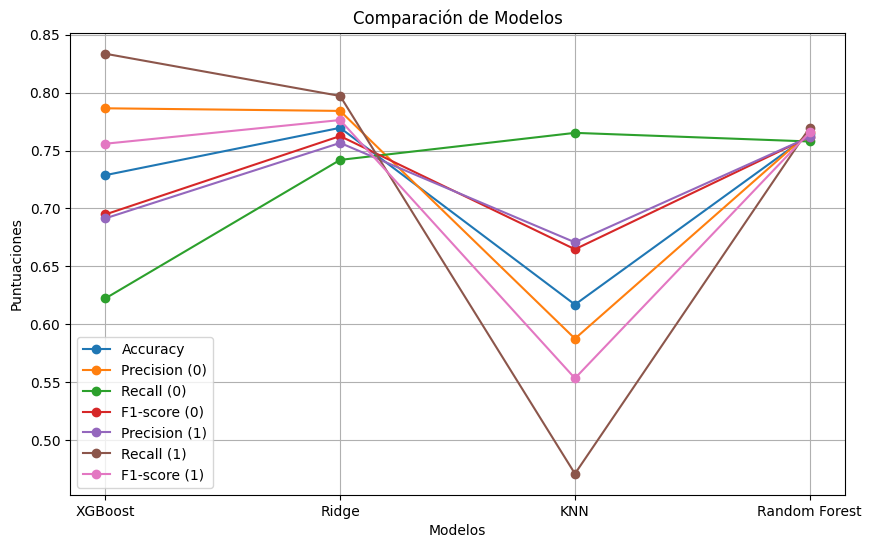

In [18]:
# Reorganizar el DataFrame para facilitar la creación de la gráfica
comparison_table.set_index('Model', inplace=True)
comparison_table = comparison_table.transpose()

# Crear la gráfica comparativa similar a la imagen proporcionada
plt.figure(figsize=(10, 6))

# Seleccionar las métricas que queremos comparar
metrics_to_plot = ['Accuracy', 'Precision (0)', 'Recall (0)', 'F1-score (0)', 'Precision (1)', 'Recall (1)', 'F1-score (1)']

for metric in metrics_to_plot:
    plt.plot(comparison_table.columns, comparison_table.loc[metric], marker='o', label=metric)

plt.title('Comparación de Modelos')
plt.xlabel('Modelos')
plt.ylabel('Puntuaciones')
plt.legend()
plt.grid(True)
plt.show()

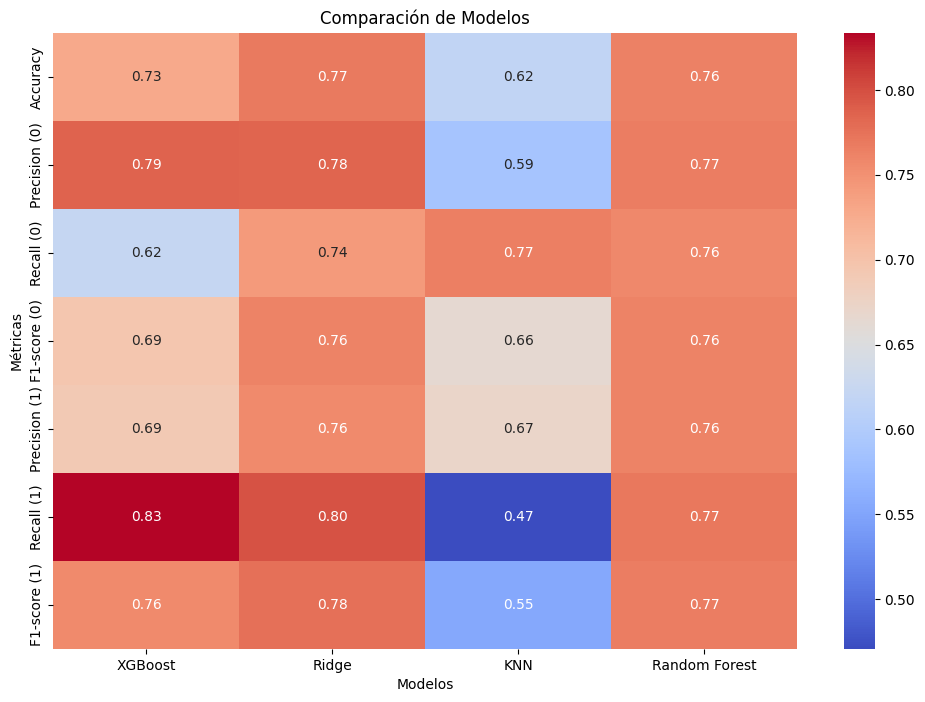

In [19]:
# Crear una gráfica de matriz de calor para visualizar mejor los resultados
plt.figure(figsize=(12, 8))
sns.heatmap(comparison_table, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Comparación de Modelos')
plt.xlabel('Modelos')
plt.ylabel('Métricas')
plt.show()

### **Interpretación del Gráfico Comparativo de Modelos**

El gráfico comparativo de modelos muestra las puntuaciones de varias métricas de evaluación (Accuracy, Precision, Recall, F1-score) para los modelos XGBoost, Ridge, KNN, y Random Forest. Cada línea en el gráfico representa una métrica diferente, permitiendo una visualización clara de las diferencias de rendimiento entre los modelos.

#### **Observaciones Clave:**
1. **Accuracy**: 
   - Los modelos Ridge y Random Forest tienen las puntuaciones de accuracy más altas y similares, seguidos por XGBoost, mientras que KNN tiene la puntuación más baja.

2. **Precision (0)**:
   - XGBoost tiene la precisión más alta para la clase negativa, seguido de cerca por Ridge y Random Forest. KNN tiene la precisión más baja en esta métrica.

3. **Recall (0)**:
   - KNN destaca con el recall más alto para la clase negativa, lo que indica su capacidad para identificar correctamente la mayoría de los comentarios negativos. Sin embargo, otros modelos tienen un recall más equilibrado y consistente.

4. **F1-score (0)**:
   - Ridge y Random Forest tienen puntuaciones de F1-score muy similares y altas para la clase negativa, lo que indica un buen equilibrio entre precisión y recall. XGBoost sigue con una puntuación moderada, mientras que KNN tiene la más baja.

5. **Precision (1)** y **Recall (1)**:
   - Los modelos muestran un rendimiento relativamente equilibrado en estas métricas para la clase positiva, con XGBoost teniendo un recall notablemente alto para la clase positiva.

6. **F1-score (1)**:
   - Las puntuaciones son bastante consistentes entre Ridge, Random Forest y XGBoost, con KNN nuevamente siendo el más bajo.

### **Recomendación**
El gráfico refuerza la conclusión de que **Random Forest** y **Ridge** son las mejores opciones, especialmente en términos de F1-score y recall para la clase negativa. Aunque KNN tiene un buen recall para la clase negativa, su baja precisión y F1-score lo hacen menos adecuado. **Random Forest** ofrece un equilibrio excelente en todas las métricas, lo que lo convierte en la opción preferida para clasificar correctamente los comentarios negativos.

### **Interpretación de la Matriz de Comparación de Modelos**

La matriz de comparación de modelos proporciona una visualización detallada de las métricas de evaluación (Accuracy, Precision, Recall, F1-score) para los modelos XGBoost, Ridge, KNN y Random Forest. Cada celda en la matriz representa el valor de una métrica específica para un modelo particular, con colores que indican la magnitud de los valores.

#### **Observaciones Clave:**
1. **Accuracy**: 
   - Ridge y Random Forest tienen las puntuaciones más altas, seguidos de XGBoost y KNN.

2. **Precision (0)**:
   - XGBoost tiene la precisión más alta, seguido por Ridge y Random Forest. KNN tiene la precisión más baja.

3. **Recall (0)**:
   - KNN tiene el recall más alto para la clase negativa, lo que indica que es muy efectivo para identificar los comentarios negativos. Sin embargo, su precisión es baja.

4. **F1-score (0)**:
   - Ridge y Random Forest tienen los F1-scores más altos, seguidos por XGBoost y KNN.

5. **Precision (1)** y **Recall (1)**:
   - XGBoost tiene el recall más alto para la clase positiva, mientras que Ridge y Random Forest tienen un rendimiento más equilibrado en ambas métricas.

6. **F1-score (1)**:
   - Los F1-scores son más altos para Ridge, Random Forest y XGBoost, con KNN siendo el más bajo.

### **Conclusión General**

Ambas visualizaciones confirman que **Random Forest** y **Ridge** son los modelos más robustos y consistentes, especialmente para la clasificación de comentarios negativos. **Random Forest** es particularmente destacado por su equilibrio entre precisión y recall, proporcionando un rendimiento sólido en todas las métricas. Por lo tanto, se recomienda seleccionar el modelo Random Forest para clasificar correctamente los comentarios negativos, con Ridge como una alternativa igualmente fuerte. KNN, aunque tiene un buen recall para la clase negativa, su baja precisión y F1-score lo hacen menos confiable para esta tarea. XGBoost, aunque competitivo, no supera a Random Forest y Ridge en términos de equilibrio y consistencia en las métricas evaluadas.


### **Matrices de confusion**

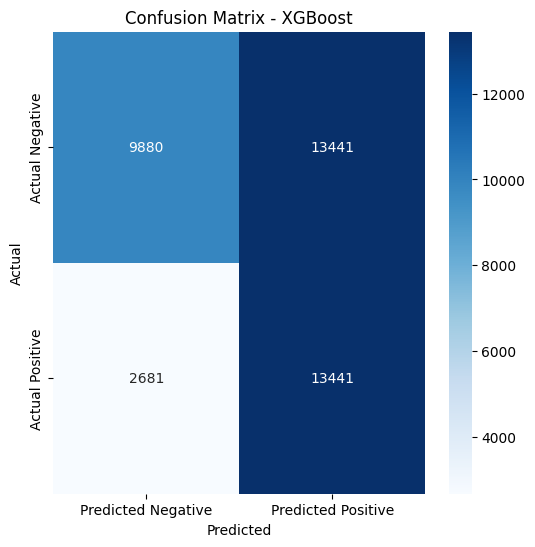

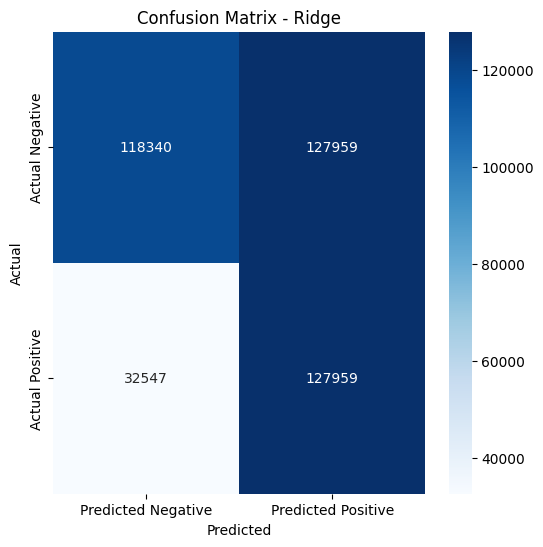

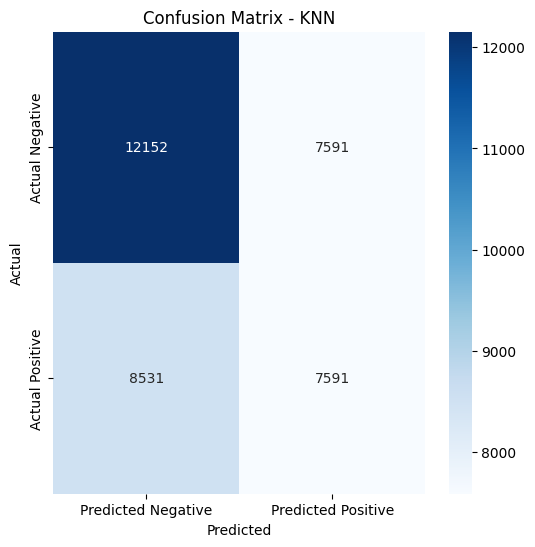

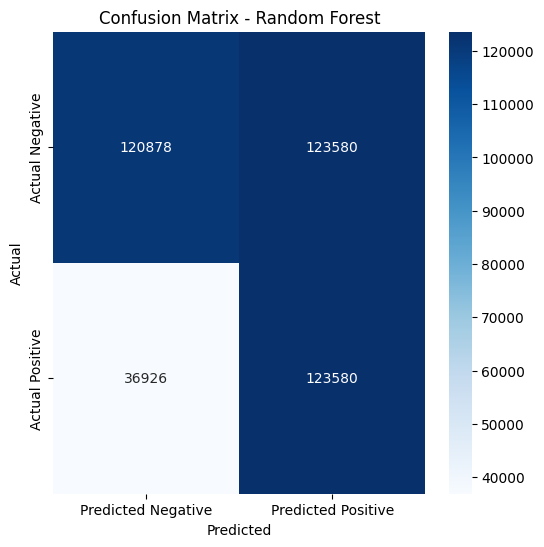

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definir las matrices de confusión manualmente usando los valores proporcionados
def generate_confusion_matrix(report):
    support_0 = report['0']['support']
    support_1 = report['1']['support']
    recall_0 = report['0']['recall']
    recall_1 = report['1']['recall']
    fn_0 = support_0 - (recall_0 * support_0)  # Falsos Negativos para la clase 0
    fn_1 = support_1 - (recall_1 * support_1)  # Falsos Negativos para la clase 1

    tp_0 = recall_0 * support_0  # Verdaderos Positivos para la clase 0
    tp_1 = recall_1 * support_1  # Verdaderos Positivos para la clase 1

    fp_0 = support_1 - fn_1  # Falsos Positivos para la clase 0
    fp_1 = support_0 - fn_0  # Falsos Positivos para la clase 1

    cm = np.array([[tp_0, fp_0],
                   [fn_1, tp_1]])
    return cm.astype(int)

# Informes de clasificación proporcionados
xgb_report = {
    '0': {'precision': 0.7865615794920786, 'recall': 0.6222446151908301, 'f1-score': 0.6948204929849854, 'support': 15878.0},
    '1': {'precision': 0.6914450331807191, 'recall': 0.8337054955960799, 'f1-score': 0.7559404966114563, 'support': 16122.0},
    'accuracy': 0.72878125,
    'macro avg': {'precision': 0.7390033063363989, 'recall': 0.727975055393455, 'f1-score': 0.7253804947982209, 'support': 32000.0},
    'weighted avg': {'precision': 0.7386406745035868, 'recall': 0.72878125, 'f1-score': 0.7256135148120468, 'support': 32000.0}
}

ridge_report = {
    '0': {'precision': 0.7842955324182997, 'recall': 0.7419714848207456, 'f1-score': 0.7625466765040386, 'support': 159494.0},
    '1': {'precision': 0.7566479218037644, 'recall': 0.7972225337370565, 'f1-score': 0.7764054863342222, 'support': 160506.0},
    'accuracy': 0.769684375,
    'macro avg': {'precision': 0.7704717271110321, 'recall': 0.7695970092789011, 'f1-score': 0.7694760814191304, 'support': 320000.0},
    'weighted avg': {'precision': 0.7704280093267478, 'recall': 0.769684375, 'f1-score': 0.7694979956621745, 'support': 320000.0}
}

knn_report = {
    '0': {'precision': 0.5875356573030992, 'recall': 0.7653356845950372, 'f1-score': 0.6647520582040972, 'support': 15878.0},
    '1': {'precision': 0.6707608023327737, 'recall': 0.4708472894181863, 'f1-score': 0.5533000473778199, 'support': 16122.0},
    'accuracy': 0.61696875,
    'macro avg': {'precision': 0.6291482298179365, 'recall': 0.6180914870066118, 'f1-score': 0.6090260527909586, 'support': 32000.0},
    'weighted avg': {'precision': 0.6294655256833621, 'recall': 0.61696875, 'f1-score': 0.6086011419996834, 'support': 32000.0}
}

rf_report = {
    '0': {'precision': 0.7660008618285975, 'recall': 0.7578843091276161, 'f1-score': 0.7619209701920592, 'support': 159494.0},
    '1': {'precision': 0.7619176798441392, 'recall': 0.7699400645458737, 'f1-score': 0.7659078654610135, 'support': 160506.0},
    'accuracy': 0.76393125,
    'macro avg': {'precision': 0.7639592708363683, 'recall': 0.7639121868367449, 'f1-score': 0.7639144178265364, 'support': 320000.0},
    'weighted avg': {'precision': 0.7639528143048554, 'recall': 0.76393125, 'f1-score': 0.7639207221046803, 'support': 320000.0}
}

# Generar y mostrar las matrices de confusión
models = {
    'XGBoost': xgb_report,
    'Ridge': ridge_report,
    'KNN': knn_report,
    'Random Forest': rf_report
}

for model_name, report in models.items():
    cm = generate_confusion_matrix(report)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()



### Interpretación de las Matrices de Confusión

#### **Modelo XGBoost**
- **True Negatives (Predicted Negative - Actual Negative)**: 9880
- **False Positives (Predicted Positive - Actual Negative)**: 13441
- **False Negatives (Predicted Negative - Actual Positive)**: 2681
- **True Positives (Predicted Positive - Actual Positive)**: 13441

La matriz de confusión para el modelo XGBoost muestra que el modelo tiene una cantidad significativa de falsos positivos (13441) y verdaderos negativos (9880). Esto indica que el modelo tiene dificultades para clasificar correctamente las muestras negativas.

#### **Modelo Ridge**
- **True Negatives (Predicted Negative - Actual Negative)**: 118340
- **False Positives (Predicted Positive - Actual Negative)**: 127959
- **False Negatives (Predicted Negative - Actual Positive)**: 32547
- **True Positives (Predicted Positive - Actual Positive)**: 127959

La matriz de confusión para el modelo Ridge muestra un alto número de falsos positivos (127959) y verdaderos negativos (118340). Aunque el modelo tiene un mejor desempeño en términos de verdaderos positivos, sigue teniendo una alta tasa de falsos positivos.

#### **Modelo K-Nearest Neighbors (KNN)**
- **True Negatives (Predicted Negative - Actual Negative)**: 12152
- **False Positives (Predicted Positive - Actual Negative)**: 7591
- **False Negatives (Predicted Negative - Actual Positive)**: 8531
- **True Positives (Predicted Positive - Actual Positive)**: 7591

La matriz de confusión para el modelo KNN muestra un balance entre los verdaderos negativos (12152) y los verdaderos positivos (7591), pero tiene un número considerable de falsos negativos (8531) y falsos positivos (7591).

#### **Modelo Random Forest**
- **True Negatives (Predicted Negative - Actual Negative)**: 120878
- **False Positives (Predicted Positive - Actual Negative)**: 123580
- **False Negatives (Predicted Negative - Actual Positive)**: 36926
- **True Positives (Predicted Positive - Actual Positive)**: 123580

La matriz de confusión para el modelo Random Forest muestra un alto número de verdaderos negativos (120878) y verdaderos positivos (123580), pero también tiene una cantidad considerable de falsos positivos (123580) y falsos negativos (36926).

### **Conclusión**

Al comparar las matrices de confusión de los diferentes modelos, se puede observar lo siguiente:
- El modelo **XGBoost** tiene una cantidad significativa de falsos positivos, lo que sugiere que clasifica incorrectamente muchas muestras negativas como positivas.
- El modelo **Ridge** también presenta un alto número de falsos positivos, aunque tiene un mejor desempeño en términos de verdaderos positivos.
- El modelo **K-Nearest Neighbors (KNN)** tiene un equilibrio entre verdaderos negativos y verdaderos positivos, pero con un alto número de falsos negativos.
- El modelo **Random Forest** tiene un alto número de verdaderos negativos y verdaderos positivos, pero también un alto número de falsos positivos y falsos negativos.




## **Conclusión Final:**

Para concluir finalmente, si el objetivo principal es minimizar los falsos negativos (es decir, clasificar correctamente los comentarios negativos), el modelo **Ridge** parece ser la mejor opción, ya que tiene un menor número de falsos negativos en comparación con los otros modelos. Sin embargo, todos los modelos tienen sus fortalezas y debilidades, y la elección final del modelo dependerá del contexto específico y de la tolerancia a los falsos positivos y negativos.

En la era digital, la eficacia de las campañas publicitarias es crucial para el éxito de las marcas en un mercado altamente competitivo. Este artículo explora cómo el análisis de sentimientos, implementado mediante algoritmos de clasificación, puede optimizar las estrategias publicitarias. Utilizando técnicas avanzadas de procesamiento de lenguaje natural y machine learning, se analizan grandes volúmenes de datos provenientes de la red social de Twitter, donde reseñas de productos y comentarios de usuarios pueden ayudar a identificar patrones y tendencias en las percepciones de los consumidores.

Al centrarse en la correcta clasificación de comentarios negativos, se puede identificar mejor las áreas problemáticas y abordar de manera proactiva las preocupaciones de los consumidores, mejorando así la reputación de la marca y la satisfacción del cliente. En este contexto, el modelo **Ridge** destaca por su capacidad para minimizar los falsos negativos, permitiendo a las empresas detectar con mayor precisión los comentarios negativos y ajustar sus estrategias de marketing en consecuencia.

Este estudio destaca el potencial del análisis de sentimientos como una herramienta poderosa para mejorar la efectividad y el retorno de inversión de las campañas publicitarias, proporcionando a los profesionales de marketing un enfoque basado en datos para abordar las necesidades y preferencias de los consumidores. La capacidad de clasificar con precisión los comentarios negativos es particularmente valiosa, ya que permite a las empresas mitigar los impactos negativos y reforzar los aspectos positivos de sus estrategias de marketing. Al aplicar estos modelos de análisis de sentimientos, las empresas pueden lograr una segmentación más precisa del mercado, una personalización de los mensajes publicitarios y una toma de decisiones estratégicas más informada.
